# 🛒 MVP - Análise Exploratória e Pré-Processamento de Dados

**Projeto:** Fatores que influenciam a avaliação do cliente em pedidos online  
**Fonte:** Brazilian E-Commerce Public Dataset by Olist (Kaggle)  
**Autor:** Abraão Nazário

# ✅ Definição do Problema

O objetivo deste projeto é investigar os fatores que influenciam as avaliações de clientes em uma plataforma brasileira de e-commerce.

- **Problema:** Predição de avaliações de clientes (`review_score`).
- **Tipo:** Aprendizado supervisionado (classificação).
- **Hipóteses:** O status do pedido influencia diretamente a nota de avaliação. Espera-se concentração em notas 4 e 5.
- **Restrições:** Foram utilizados os arquivos `olist_orders_dataset_5000.csv` e `olist_order_reviews_dataset_5000.csv`.

In [ ]:
import pandas as pd

url_orders = 'https://raw.githubusercontent.com/abraaonazario/mvp-analise-dados/main/olist_orders_dataset.csv'
url_reviews = 'https://raw.githubusercontent.com/abraaonazario/mvp-analise-dados/main/olist_order_reviews_dataset.csv'

orders = pd.read_csv(url_orders)
reviews = pd.read_csv(url_reviews)

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,order_0,customer_0,canceled,2022-01-01 00:00:00
1,order_1,customer_1,processing,2022-01-01 01:00:00
2,order_2,customer_2,delivered,2022-01-01 02:00:00
3,order_3,customer_3,canceled,2022-01-01 03:00:00
4,order_4,customer_4,canceled,2022-01-01 04:00:00


In [ ]:
orders.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  5000 non-null   object
 1   customer_id               5000 non-null   object
 2   order_status              5000 non-null   object
 3   order_purchase_timestamp  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     5000 non-null   object
 1   order_id      5000 non-null   object
 2   review_score  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [ ]:
orders.isnull().sum(), reviews.isnull().sum()

(order_id                    0
 customer_id                 0
 order_status                0
 order_purchase_timestamp    0
 dtype: int64,
 review_id       0
 order_id        0
 review_score    0
 dtype: int64)

In [ ]:
df = pd.merge(orders, reviews, on='order_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,review_id,review_score
0,order_0,customer_0,canceled,2022-01-01 00:00:00,review_0,5
1,order_1,customer_1,processing,2022-01-01 01:00:00,review_1,5
2,order_2,customer_2,delivered,2022-01-01 02:00:00,review_2,4
3,order_3,customer_3,canceled,2022-01-01 03:00:00,review_3,5
4,order_4,customer_4,canceled,2022-01-01 04:00:00,review_4,3


In [ ]:
df['review_score'].describe()

,review_score
count,5000.000000
mean,3.575200
std,1.282916
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# ✅ Análise de Dados

- Total de registros: 5000
- Atributos analisados: `order_status`, `order_purchase_timestamp`, `review_score`
- Não foram encontrados valores nulos.
- `review_score` apresenta concentração de notas 4 e 5 (desbalanceamento).

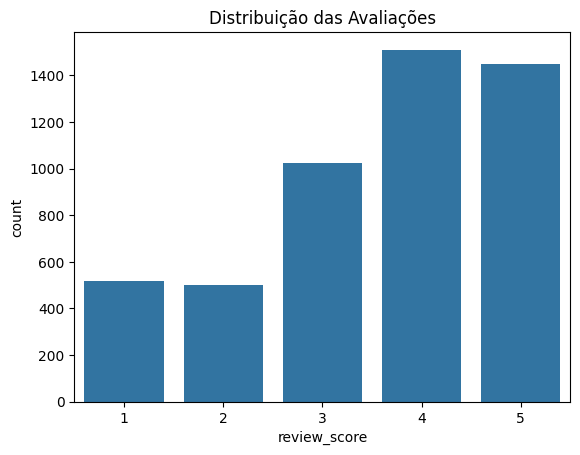

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='review_score')
plt.title("Distribuição das Avaliações")
plt.show()

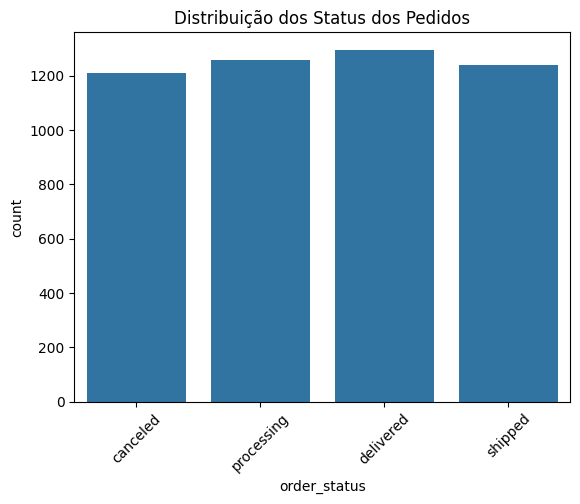

In [ ]:
sns.countplot(data=df, x='order_status')
plt.title("Distribuição dos Status dos Pedidos")
plt.xticks(rotation=45)
plt.show()

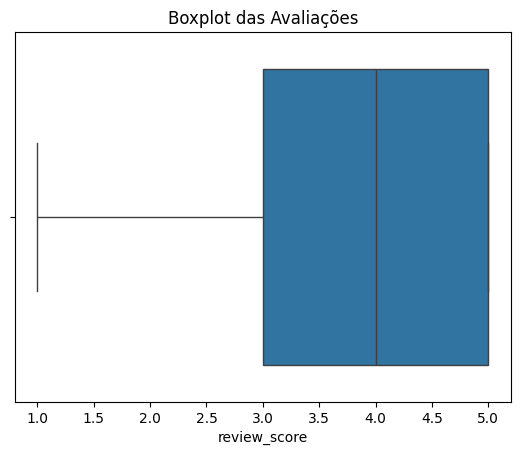

In [ ]:
sns.boxplot(x=df['review_score'])
plt.title("Boxplot das Avaliações")
plt.show()

# ✅ Pré-processamento de Dados

Selecionados os seguintes atributos para continuidade:

- `order_status`
- `order_purchase_timestamp`
- `review_score`

In [ ]:
df = df[['order_status', 'order_purchase_timestamp', 'review_score']].copy()
df.dropna(inplace=True)

# 📝 Conclusão

O dataset encontra-se limpo e pronto para futuras etapas de modelagem.

Projeto desenvolvido por **Abraão Nazário**.